In [1]:
# Import required Python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the file and define problem statement

'''

-Web login fraud data:-
1. Develop a supervised machine learning model to identify fraudulent login. 
2. Apply unsupervised learning to cluster data based on inherent patterns,
3. Build an end-to-end machine learning pipeline integrating preprocessing, feature engineering, model training, and evaluation for streamlined, scalable model development and deployment.

'''

mb= pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Pune(45) - Daily updated files\capstone\MyBank.csv")
mb


,TransactionKey,ConnectionRegion,V1CF,V2CF,V3CF,V4CF,V5CF,TimeZone,AreaCode,ConnectionOrg,...,webSessOS,webSessWebBrowser,LastLong,LastLat,CurrentLong,CurrentLat,IsOldDevice,WebSessionRetail,MainEntityUse,Fraud
0,16758,south central@texas@us,99,98,10,803,19820,-5.0,602.0,013 netvision fix ip users,...,Mac OS X,Chrome,-108.5530,NaN,9.4400,NaN,0.0,0.0,NaN,0
1,8912,northeast@new york@us,99,94,61,602,16980,-4.0,512.0,013 netvision fix ip users,...,Windows 7,Edge,-121.8382,27.9860,-112.0826,33.7985,0.0,0.0,315.0,0
2,92186,mid atlantic@new jersey@us,76,95,66,505,35620,-6.0,407.0,013 netvision fix ip users,...,Windows 7,Mobile Safari,-74.0734,33.7985,-80.3120,32.8494,1.0,NaN,333.0,0
3,12924,south central@arkansas@us,99,23,50,0,35620,-5.0,202.0,013 netvision fix ip users,...,Windows 7,Mobile Safari,-88.1029,27.9860,-84.3883,42.1530,1.0,0.0,327.0,0
4,125650,mid atlantic@new jersey@us,99,74,80,602,19100,-8.0,313.0,013 netvision fix ip users,...,Windows 7,Chrome,-58.5244,34.9497,-111.3270,34.0476,1.0,0.0,394.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138747,4918,southwest@california@us,86,85,80,602,0,-6.0,630.0,zynga corp.,...,iOS,Chrome,-66.9200,40.7589,-119.1831,34.0526,1.0,0.0,406.0,0
138748,117775,southeast@georgia@us,99,97,90,527,41860,-8.0,630.0,zynga corp.,...,Mac OS X,Chrome,-89.9481,40.7589,-74.1945,40.7387,1.0,0.0,360.0,0
138749,70441,great lakes@ohio@us,99,88,90,618,12420,-5.0,212.0,zynga corp.,...,Mac OS X,Chrome,-81.2526,40.9526,-77.2718,40.7589,1.0,0.0,240.0,0
138750,127115,great lakes@illinois@us,99,23,23,819,16980,-6.0,704.0,zynga corp.,...,Windows 7,Chrome,-73.7644,42.3976,-117.7899,41.8488,NaN,0.0,395.0,0


In [3]:
mb.tail()

,TransactionKey,ConnectionRegion,V1CF,V2CF,V3CF,V4CF,V5CF,TimeZone,AreaCode,ConnectionOrg,...,webSessOS,webSessWebBrowser,LastLong,LastLat,CurrentLong,CurrentLat,IsOldDevice,WebSessionRetail,MainEntityUse,Fraud
138747,4918,southwest@california@us,86,85,80,602,0,-6.0,630.0,zynga corp.,...,iOS,Chrome,-66.9200,40.7589,-119.1831,34.0526,1.0,0.0,406.0,0
138748,117775,southeast@georgia@us,99,97,90,527,41860,-8.0,630.0,zynga corp.,...,Mac OS X,Chrome,-89.9481,40.7589,-74.1945,40.7387,1.0,0.0,360.0,0
138749,70441,great lakes@ohio@us,99,88,90,618,12420,-5.0,212.0,zynga corp.,...,Mac OS X,Chrome,-81.2526,40.9526,-77.2718,40.7589,1.0,0.0,240.0,0
138750,127115,great lakes@illinois@us,99,23,23,819,16980,-6.0,704.0,zynga corp.,...,Windows 7,Chrome,-73.7644,42.3976,-117.7899,41.8488,NaN,0.0,395.0,0
138751,40331,southeast@georgia@us,99,63,50,501,19100,-5.0,305.0,zynga corp.,...,Windows 7,Mobile Safari,-104.9856,33.9535,-82.9995,33.7985,1.0,0.0,293.0,0


In [4]:
# dictionary if available.. put here
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionKey       138752 non-null  int64  
 1   ConnectionRegion     138752 non-null  object 
 2   V1CF                 138752 non-null  int64  
 3   V2CF                 138752 non-null  int64  
 4   V3CF                 138752 non-null  int64  
 5   V4CF                 138752 non-null  int64  
 6   V5CF                 138752 non-null  int64  
 7   TimeZone             138752 non-null  float64
 8   AreaCode             138740 non-null  float64
 9   ConnectionOrg        138752 non-null  object 
 10  ConnectionType       138752 non-null  object 
 11  ConnectionSpeed      138752 non-null  object 
 12  V6CF                 138752 non-null  object 
 13  channel              138752 non-null  object 
 14  TransactionDateTime  138752 non-null  object 
 15  AddressUpdateDate

Description of each column of your dataset:

1. **TransactionKey:**
   - *Insight:* Unique identifier for each transaction.
   - *Business Use:* Helps track and identify individual transactions.

2. **ConnectionRegion:**
   - *Insight:* Indicates the geographical region of the connection.
   - *Business Use:* Allows analysis of regional patterns in transactions.

3. **V1CF, V2CF, V3CF, V4CF, V5CF, V6CF:**
   - *Insight:* Numerical features representing different aspects of the transaction.
   - *Business Use:* Capture specific characteristics or attributes of transactions.

4. **TimeZone:**
   - *Insight:* Timezone of the transaction.
   - *Business Use:* Helps in time-based analysis and understanding transaction timing patterns.

5. **AreaCode:**
   - *Insight:* Area code associated with the transaction.
   - *Business Use:* May provide location-specific information related to transactions.

6. **ConnectionOrg:**
   - *Insight:* Organization associated with the connection.
   - *Business Use:* Offers insights into the type of entities involved in transactions.

7. **ConnectionType:**
   - *Insight:* Type of connection used for the transaction.
   - *Business Use:* May impact transaction speed and security.

8. **ConnectionSpeed:**
   - *Insight:* Speed of the internet connection.
   - *Business Use:* Can influence the user experience during transactions.

9. **channel:**
   - *Insight:* Channel through which the transaction occurred.
   - *Business Use:* Identifies the platform or medium used for transactions.

10. **TransactionDateTime, AddressUpdateDate, EmailUpdateDate:**
    - *Insight:* Timestamps for various updates and the transaction itself.
    - *Business Use:* Facilitates time-based analysis and tracking of updates.

11. **webSessOS, webSessWebBrowser:**
    - *Insight:* Operating system and web browser used during the web session.
    - *Business Use:* Influences user experience and compatibility.

12. **LastLong, LastLat, CurrentLong, CurrentLat:**
    - *Insight:* Geographical coordinates indicating location.
    - *Business Use:* Provides location data for analysis, potential fraud detection.

13. **IsOldDevice, WebSessionRetail, MainEntityUse:**
    - *Insight:* Categorical features representing device status, web session type, and main entity use.
    - *Business Use:* Classifies transactions based on device characteristics and behavior.

14. **Fraud:**
    - *Insight:* Binary label indicating whether the transaction is fraudulent (1) or not (0).
    - *Business Use:* Target variable for fraud detection modeling.



In [5]:
# reset index to Transactionkey-------------------------
mb.TransactionKey.nunique()
mb.set_index('TransactionKey', inplace=True)


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

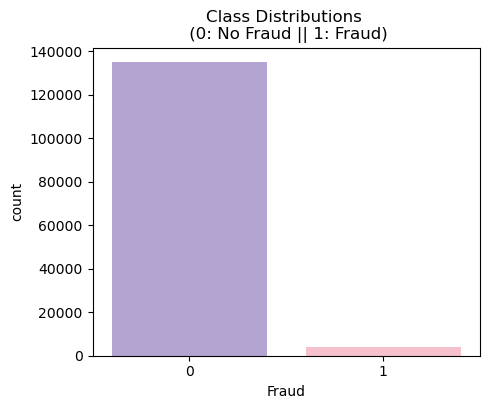

In [6]:
# checking imbalance of output column

colors = ["#B19CDA", "#FFB8C8"]
plt.figure(figsize=(5,4))
sns.countplot(x='Fraud', data=mb, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=12)

In [7]:
class_percentages = mb.Fraud.value_counts(normalize=True) * 100
print(class_percentages)


0    97.143825
1     2.856175
Name: Fraud, dtype: float64


Points to keep in mind:

- > Never test on the oversampled or undersampled dataset.
- > If we want to implement cross validation, remember to oversample or undersample your training data during cross-validation, not before!
- > Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix
- > Most of the transactions were Non-Fraud (97.14%) of the time, while Fraud transactions occurs (2.85%) of the time in the dataframe.

## 1. Handling Null Values 

In [8]:
# Splitting the ConnectionRegion based on delimiter

mb[['region', 'state', 'country']]= mb.ConnectionRegion.str.split('@', expand= True)
mb.drop('ConnectionRegion', axis=1, inplace=True)
mb[['region', 'state', 'country']]

,region,state,country
TransactionKey,,,
16758,south central,texas,us
8912,northeast,new york,us
92186,mid atlantic,new jersey,us
12924,south central,arkansas,us
125650,mid atlantic,new jersey,us
...,...,...,...
4918,southwest,california,us
117775,southeast,georgia,us
70441,great lakes,ohio,us


In [9]:
# mb['region'].value_counts().index.tolist() # seeing list of all regions

# len(mb[mb['region'] == 'unknown']) # there are 47852 rows with unknown in region

mb['region'].value_counts(normalize=True) # most frequent values

mb['region'].replace('unknown', 'southwest', inplace=True)

In [10]:
mb['state'].value_counts().index.tolist() # seeing list of all states
mb['state'].value_counts(normalize=True) # most frequent values

# the following entries are not typically considered as places on Earth:
# 1. `none`
# 2. `unknown`
# 3. `reading`

most_frequent_states = mb['state'].value_counts().nlargest(3).index
mb['state'].replace({'unknown': most_frequent_states[0], 'none': most_frequent_states[1], 'reading': most_frequent_states[2]}, inplace =True)


In [11]:
mb['country'].value_counts(normalize=True) # most frequent values


us    0.957550
ve    0.005975
mx    0.003351
gb    0.002825
ca    0.002025
        ...   
fj    0.000007
mg    0.000007
ci    0.000007
lc    0.000007
dj    0.000007
Name: country, Length: 145, dtype: float64

- "us" has the highest proportion, approximately 95.76%.
- "ve" (Venezuela) has a proportion of around 0.60%.
- "mx" (Mexico) has a proportion of around 0.34%.
- "gb" (United Kingdom) has a proportion of around 0.28%.
- "ca" (Canada) has a proportion of around 0.20%.

 seems like the vast majority of entries are associated with the United States ("us"), and there is a long tail of less frequent countries.

In [12]:
# Label encoding for connection region

label_encoder= LabelEncoder()

mb['region'] = label_encoder.fit_transform(mb['region'])
mb['state'] = label_encoder.fit_transform(mb['state'])
mb['country'] = label_encoder.fit_transform(mb['country']) 

print(mb['region'].nunique())
print(mb['state'].nunique())
print(mb['country'].nunique())

64
456
145


Text(0.5, 1.0, 'Count of Time Zones')

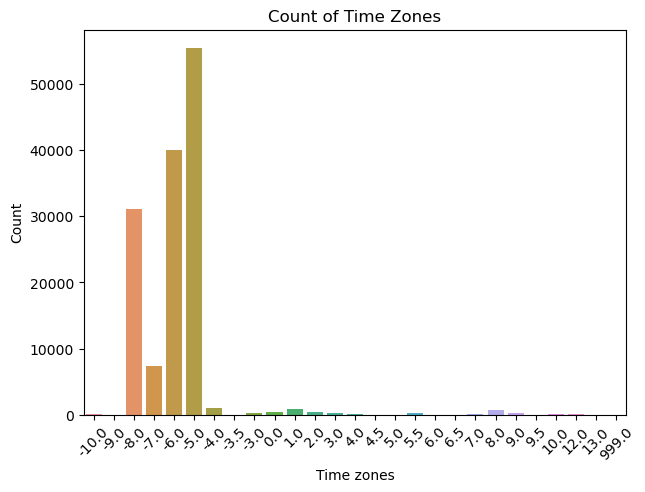

In [13]:
# TimeZone             
# how to bin these

plt.figure(figsize=(7,5))
sns.countplot(mb, x='TimeZone')
plt.xticks(rotation= 45)
plt.xlabel("Time zones")
plt.ylabel("Count")
plt.title("Count of Time Zones")

In [14]:
mb['TimeZone'].value_counts().index.tolist()
# there are invalid values such as 999 so we replace those with -5
# only 4 rows and 3 out of them  have a coutry code of 136
# most of the values lie between countries like US, Canada, Mexico and some South American countries



mb['TimeZone'].replace(999, -5, inplace=True)
# mb[mb.TimeZone == 999]

In [15]:
# Most common area code seem to be 212 and 312 both coresponding to New York and Chicago respectively

mb.AreaCode.value_counts(normalize=True)
mb.AreaCode.fillna(212, inplace=True)
mb.AreaCode.isnull().sum()

0

In [16]:
# Impute missing value with median seemed more appropriate

mb.MainEntityUse.median()
mb.MainEntityUse.fillna(373, inplace=True)
mb.MainEntityUse.isnull().sum()

0

In [17]:
# Impute missing data with most common response

mb.IsOldDevice.value_counts(normalize=True)
mb.IsOldDevice.fillna(1, inplace=True)
mb.IsOldDevice.isnull().sum()

0

In [18]:
# Filled all the nan values with 1

mb.WebSessionRetail.value_counts(normalize=True)
mb.WebSessionRetail.fillna(1, inplace=True)
mb.WebSessionRetail.isnull().sum()

0

In [19]:

mb.drop(['LastLong', 'LastLat', 'CurrentLat', 'CurrentLong'], axis=1, inplace=True)


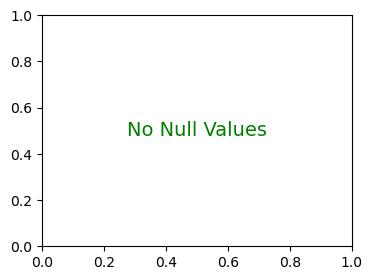

In [20]:
# chaecking and representing for null values
# mb.isnull().sum()[mb.isnull().sum()>0]

plt.figure(figsize=(4,3))


mb_null = pd.DataFrame(mb.isnull().sum()[mb.isnull().sum()>0])
mb_null.columns= ['count_of_null']
mb_null = mb_null.sort_values('count_of_null', ascending=False)

if not mb_null.empty:
    sns.barplot(x=mb_null.index, y= 'count_of_null', data=mb_null, palette='mako' )
    plt.xticks(rotation= 45)
    plt.xlabel("Columns")
    plt.ylabel("Count of Null Values")
    plt.title("Count of Null Values in Each Column")
else:
    plt.text(0.5, 0.5, 'No Null Values', horizontalalignment='center', verticalalignment='center', fontsize=14, color='green')
plt.show()

## 2. Working with Categorical Columns

In [21]:
# converting categorical columns to numerical for analysis
mb.select_dtypes(include='object')

,ConnectionOrg,ConnectionType,ConnectionSpeed,V6CF,channel,TransactionDateTime,AddressUpdateDate,EmailUpdateDate,webSessOS,webSessWebBrowser
TransactionKey,,,,,,,,,,
16758,013 netvision fix ip users,cable,low,net,SOA,23/05/2013 20:13:05:000,21/08/2004 05:33:51:000,14/10/2011 16:37:56:000,Mac OS X,Chrome
8912,013 netvision fix ip users,cable,high,net.il,KOL,27/05/2013 10:56:53:000,24/08/2010 13:23:30:000,06/09/2007 19:24:07:000,Windows 7,Edge
92186,013 netvision fix ip users,cable,medium,net,SOA,23/05/2013 12:33:59:000,26/03/2013 00:43:01:000,20/06/2012 00:02:35:000,Windows 7,Mobile Safari
12924,013 netvision fix ip users,dsl,high,net,SOA,31/05/2013 14:04:35:000,07/06/2009 14:49:06:000,13/12/2010 14:08:42:000,Windows 7,Mobile Safari
125650,013 netvision fix ip users,cable,medium,net,SOA,01/06/2013 21:07:58:000,09/05/2012 13:52:37:000,20/04/2009 14:22:57:000,Windows 7,Chrome
...,...,...,...,...,...,...,...,...,...,...
4918,zynga corp.,tx,medium,wv.us,KOL,26/05/2013 10:02:15:000,01/11/2005 10:06:10:000,15/10/2008 13:12:47:000,iOS,Chrome
117775,zynga corp.,dsl,medium,net,KOL,22/05/2013 23:02:51:000,07/02/2003 01:39:07:000,21/09/2011 20:05:54:000,Mac OS X,Chrome
70441,zynga corp.,cable,low,net,KOL,31/05/2013 22:28:51:000,16/04/2011 12:07:52:000,14/09/2012 15:08:44:000,Mac OS X,Chrome


In [22]:
# AreaCode

# top 5 regions where area code is zero are 54, 17 34, 49, and 53
# majority that out of area code 0 belong to country 136 
# these refer to corrsponding area codes of 212(12k), 312(9k), 323(4k), 713(4k)
# these areas corespond to NYE, Chicago, LA and Houston ... so i a can be confident that atleast the area code would be of us
# i am going to put it in ratios of these places as they are in the dataset


# area_zero = mb[mb['AreaCode']== 0]

# reverse_area = mb[mb['region'].isin([54, 17, 34, 49, 53])]
# reverse_area.AreaCode.value_counts()

replacement_areas = [212, 312, 323, 713]
ratio = [0.41, 0.31, 0.14, 0.14]
replacement_array=np.random.choice(replacement_areas, size=len(mb), p=np.array(ratio)/ sum(ratio))


mb['AreaCode'] = np.where(mb['AreaCode']==0, replacement_array, mb['AreaCode'])
                             
mb['AreaCode'].value_counts(normalize=True)



212.0    0.123328
312.0    0.091516
323.0    0.042889
713.0    0.039733
404.0    0.027005
           ...   
229.0    0.000014
709.0    0.000014
819.0    0.000007
308.0    0.000007
682.0    0.000007
Name: AreaCode, Length: 242, dtype: float64

In [23]:
# mb['ConnectionType'].value_counts(normalize=True)
# replace 'unknown' with most common response
# mb['ConnectionType'].replace('unknown', 'cable', inplace=True)
mb['ConnectionType']= pd.factorize(mb['ConnectionType'])[0]
print(mb['ConnectionType'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10]


In [24]:
# replace unknown with medium and do numeric encoding


mb['ConnectionSpeed'].replace('unknown', 'medium', inplace= True)
mb['ConnectionSpeed']= pd.factorize(mb['ConnectionSpeed'])[0]
print(mb['ConnectionSpeed'].value_counts())

2    97831
1    26061
0    14860
Name: ConnectionSpeed, dtype: int64


In [25]:
# We dont have any unknown values here so thats good!

mb['channel']= pd.factorize(mb['channel'])[0]
print(mb['channel'].unique())

[0 1 2 3]


In [26]:
# V6CF.. 231 unique values


mb['V6CF'].nunique()
value_counts = mb['V6CF'].value_counts(normalize=True) # seeing list of all values


top_responses= value_counts[value_counts.cumsum() <= 0.98].index
top_responses
# in V6CF column, top 98 percent categories are being encoded and the rest are put in category other

category_98={category: i for i, category in enumerate(top_responses)}
mb['V6CF'] = mb['V6CF'].map(category_98).fillna(7)
print(mb['V6CF'].unique())


# why does it make a list of 6 and sometimes a list of only 4 ????????

[0. 7. 2. 1. 4. 3. 5. 6.]


In [27]:
mb['webSessOS']= pd.factorize(mb['webSessOS'])[0]
print(mb['webSessOS'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [28]:
# webSessWebBrowser

mb['webSessWebBrowser']= pd.factorize(mb['webSessWebBrowser'])[0]
print(mb['webSessWebBrowser'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [29]:
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


NameError: name 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' is not defined

In [ ]:
# Display range and distribution
print(mb['TransactionDateTime'].describe())

# Plot a histogram
# plt.figure(figsize=(10, 6))
# mb['TransactionDateTime'].hist(bins=50, color='blue', alpha=0.7)
# plt.title('Distribution of TransactionDateTime')
# plt.xlabel('TransactionDateTime')
# plt.ylabel('Frequency')
# plt.show()


In [ ]:
# TransactionDateTime
mb['TransactionDateTime'] = pd.to_datetime(mb['TransactionDateTime'], format= '%d/%m/%Y %H:%M:%S:%f')

mb['TransactionYear']= mb['TransactionDateTime'].dt.year
mb['TransactionMonth']= mb['TransactionDateTime'].dt.month
mb['TransactionDay']= mb['TransactionDateTime'].dt.day
mb['TransactionHour']= mb['TransactionDateTime'].dt.hour
mb['TransactionMinute']= mb['TransactionDateTime'].dt.minute
mb['TransactionSecond']= mb['TransactionDateTime'].dt.second
mb['TransactionMicrosecond']= mb['TransactionDateTime'].dt.microsecond

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# Display range and distribution
print(mb['TransactionDateTime'].describe())

# Plot a histogram
plt.figure(figsize=(10, 6))
mb['TransactionDateTime'].hist(bins=50, color='blue', alpha=0.7)
plt.title('Distribution of TransactionDateTime')
plt.xlabel('TransactionDateTime')
plt.ylabel('Frequency')
plt.show()

# Label encoding for time of day
bins = [0, 6, 12, 18, 24]
labels = [0, 1, 2, 3]
mb['TimeOfDay'] = pd.cut(mb['TransactionHour'], bins=bins, labels=labels, include_lowest=True).astype(int)

# Label encoding for day of week
label_encoder = LabelEncoder()
mb['DayOfWeek'] = label_encoder.fit_transform(mb['TransactionDateTime'].dt.day_name())

# Label encoding for month
mb['Month'] = mb['TransactionDateTime'].dt.month

# Label encoding for season
seasons = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}
mb['Season'] = mb['TransactionMonth'].apply(lambda x: next(season for season, months in seasons.items() if x in months))

# Display the encoded columns
encoded_columns = ['TimeOfDay', 'DayOfWeek', 'Month', 'Season']
for column in encoded_columns:
    print(f'{column}:\n{mb[column].value_counts()}\n')


In [ ]:
# AddressUpdateDate

mb['AddressUpdateDate'] = pd.to_datetime(mb['AddressUpdateDate'], format= '%d/%m/%Y %H:%M:%S:%f')

mb['AdUpdateYear']= mb['AddressUpdateDate'].dt.year
mb['AdUpdateMonth']= mb['AddressUpdateDate'].dt.month
mb['AdUpdateDay']= mb['AddressUpdateDate'].dt.day
mb['AdUpdateHour']= mb['AddressUpdateDate'].dt.hour
mb['AdUpdateMinute']= mb['AddressUpdateDate'].dt.minute
mb['AdUpdateSecond']= mb['AddressUpdateDate'].dt.second
mb['AdUpdateMicrosecond']= mb['AddressUpdateDate'].dt.microsecond

In [ ]:
# EmailUpdateDate

# Remove the row where 'EmailUpdateDate' is 0
mb['EmailUpdateDate'] = mb['EmailUpdateDate'].replace("0", np.nan)

mb['EmailUpdateDate'] = pd.to_datetime(mb['EmailUpdateDate'], format= '%d/%m/%Y %H:%M:%S:%f')

mb['EmailUpdateYear']= mb['EmailUpdateDate'].dt.year
mb['EmailUpdateMonth']= mb['EmailUpdateDate'].dt.month
mb['EmailUpdateDay']= mb['EmailUpdateDate'].dt.day
mb['EmailUpdateHour']= mb['EmailUpdateDate'].dt.hour
mb['EmailUpdateMinute']= mb['EmailUpdateDate'].dt.minute
mb['EmailUpdateSecond']= mb['EmailUpdateDate'].dt.second
mb['EmailUpdateMicrosecond']= mb['EmailUpdateDate'].dt.microsecond

In [ ]:
If you want to consider the semantic meaning of the words and group them accordingly, using word embeddings is a good approach. Word embeddings capture the semantic relationships between words in a continuous vector space. Here's a step-by-step guide using Word2Vec for grouping your words based on semantic meaning:

### 1. Tokenize the Text:
Tokenize your text into individual words. You may want to preprocess the text by removing punctuation, converting to lowercase, and handling any other specific requirements.

```python
from nltk.tokenize import word_tokenize
import string

# Assuming 'ConnectionOrg' is the column with text data
mb['tokenized_text'] = mb['ConnectionOrg'].apply(lambda x: word_tokenize(x.lower()))
mb['tokenized_text'] = mb['tokenized_text'].apply(lambda x: [word for word in x if word.isalnum()])
```

### 2. Train Word2Vec Model:
Train a Word2Vec model on the tokenized text to obtain word vectors. Adjust parameters such as vector size, window size, and minimum count based on your data.

```python
from gensim.models import Word2Vec

word2vec_model = Word2Vec(sentences=mb['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)
```

### 3. Create Word Embedding Matrix:
For each word in your vocabulary, obtain its corresponding vector from the trained Word2Vec model.

```python
word_vectors = word2vec_model.wv
```

### 4. Grouping Words Based on Semantic Similarity:
Group words based on semantic similarity using a clustering algorithm. For example, you can use hierarchical clustering or k-means clustering.

```python
from sklearn.cluster import AgglomerativeClustering

# Assuming you have n clusters (adjust as needed)
num_clusters = 5
clustering_model = AgglomerativeClustering(n_clusters=num_clusters, affinity='cosine', linkage='average')
mb['cluster_label'] = clustering_model.fit_predict(word_vectors.vectors)
```

### 5. Analyze Results:
Explore the resulting clusters to understand how words have been grouped based on their semantic meaning.

```python
# Display words and their corresponding cluster labels
clustered_words = pd.DataFrame({'Word': word_vectors.index_to_key, 'Cluster': mb['cluster_label']})
print(clustered_words)
```

This approach takes into account the semantic meaning of words in your text and groups them accordingly. Adjust the parameters of the Word2Vec model and clustering algorithm based on the characteristics of your data.

In [ ]:
def categorize_word(word, categories):
    for category, words in categories.items():
        if word in words:
            return category
    return 'Other'

# Your existing categories
categories = {
    'Financial': ['finance', 'fund', 'trust', 'banking', 'insurance', 'administration', 'bank'],
    'Healthcare': ['hospital', 'medical', 'healthcare', 'hospitals', 'cancer'],
    'Education': ['university', 'education', 'schools', 'school', 'college'],
    'Technology': ['amazon', 'intel', 'google', 'facebook', 'cisco', 'microsoft', 'apple', 'yahoo!'],
    'Communication/Network': ['network', 'communications', 'cable', 'internet', 'wireless', 'fiber'],
    'Corporate/Business': ['llc', 'inc', 'ltd', 'corp', 'limited', 'corporation', 'company', 'co', 'services', 'industries', 'l.l.c'],
    'Legal/Justice': ['justice']
}

# Apply the categorization function to create a new 'Category' column
mb['Category'] = mb['ConnectionOrg'].apply(lambda x: categorize_word(x, categories))

# Label encode the 'Category' column
label_encoder = LabelEncoder()
mb['labelled_co'] = label_encoder.fit_transform(mb['Category'])

print(mb['labelled_co'].nunique())
print(mb[['ConnectionOrg', 'Category', 'labelled_co']])


In [ ]:
categories = {
    'Financial': ['finance', 'fund', 'trust', 'banking', 'insurance', 'administration', 'bank'],
    'Healthcare': ['hospital', 'medical', 'healthcare', 'hospitals', 'cancer'],
    'Education': ['university', 'education', 'schools', 'school', 'college'],
    'Technology': ['amazon', 'intel', 'google', 'facebook', 'cisco', 'microsoft', 'apple', 'yahoo!'],
    'Communication/Network': ['network', 'communications', 'cable', 'internet', 'wireless', 'fiber'],
    'Corporate/Business': ['llc', 'inc', 'ltd', 'corp', 'limited', 'corporation', 'company', 'co', 'services', 'industries', 'l.l.c'],
    'Legal/Justice': ['justice']
}
def other_cat(word, categories):
    for category, words in categories.items():
        if word in words:
            return category
    return 'other'



mb['mapped_co'] = mb['ConnectionOrg'].apply(lambda x: other_cat(x, categories))

le = LabelEncoder()

mb['Labelled_Co']= le.fit_transform(mb['New_Cat_Co'])

print(mb['labelled_co'].nunique())
print(mb[['ConnectionOrg', 'mapped_co', 'labelled_co']])

# problems with this approach:
# 1. it does not label all in each category accurately
# 2. what if one row has more than one keyword from diff categories

In [ ]:
# ConnectionOrg.... 7620 unique values what do we do????
# top 10 percent in frequency still has 762 categories...
# print(mb['ConnectionOrg'].nunique())


word_cat = {word: category for category, words in categories.items() for word in words}


label_encoders = {category: LabelEncoder().fit(words) for category, words in categories.items()}
label_encoders['Other'] = LabelEncoder().fit(['other'])


mb['mapped_co'] = mb['ConnectionOrg'].map(word_cat).fillna('other')
mb['labelled_co'] = label_encoders['other'].transform(mb['mapped_co'])



print(mb['labelled_co'].nunique())
print(mb[['ConnectionOrg', 'mapped_co', 'labelled_co']])


# top_companies = df['Company'].value_counts().nlargest(top_n).index
# df['Company_TopN'] = np.where(df['Company'].isin(top_companies), df['Company'], 'Other')


# 
# 


# mb['ConnectionOrg'].value_counts(normalize=True) # seeing list of all values

# # in V6CF column, top 98 percent categories are being encoded and the rest are put in category other

# category_98={category: i for i, category in enumerate(top_responses)}
# mb['V6CF'] = mb['V6CF'].map(category_98).fillna(4)
# print(mb['V6CF'].unique())





In [ ]:
import pandas as pd

# Assuming mb is your DataFrame and V6CF is the column you want to encode
mb['V6CF_encoded'] = pd.factorize(mb['V6CF'])[0]

# Define the mapping for specific categories
category_mapping = {
    'llc': 0, 'inc': 0, 'ltd': 0, 'corp': 0, 'university': 1, 'fund': 2, 'net': 3,
    'hospital': 4, 'education': 1, 'limited': 0, 'network': 3, 'schools': 1, 'industries': 0,
    'corporation': 0, 'communications': 0, 'co': 0, 'services': 5, 'healthcare': 4,
    'financial': 2, 'finance': 2, 'trust': 2, 'medical': 4, 'company': 0, 'justice': 6,
    'administration': 6, 'insurance': 2, 'banking': 2
}

# Map the specific categories to the encoded values
mb['V6CF_encoded'] = mb['V6CF'].map(category_mapping).fillna(7)  # Assign 7 to unknown categories

# Print the updated DataFrame
print(mb['V6CF_encoded'].unique())


In [ ]:
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
aaaaaaaaaaaaaaaaaaaaaaaaaaa

# 3. Adressing Class Imbalance, Scaling and Dealing with outliers

In [34]:
m= mb.drop(['ConnectionOrg', 'TransactionDateTime', 'AddressUpdateDate',
       'EmailUpdateDate'], axis=1)
#  V6CF_encoded
m

,V1CF,V2CF,V3CF,V4CF,V5CF,TimeZone,AreaCode,ConnectionType,ConnectionSpeed,V6CF,channel,webSessOS,webSessWebBrowser,IsOldDevice,WebSessionRetail,MainEntityUse,Fraud,region,state,country
TransactionKey,,,,,,,,,,,,,,,,,,,,
16758,99,98,10,803,19820,-5.0,602.0,0,0,0.0,0,0,0,0.0,0.0,373.0,0,49,401,136
8912,99,94,61,602,16980,-4.0,512.0,0,1,7.0,1,1,1,0.0,0.0,315.0,0,34,276,136
92186,76,95,66,505,35620,-6.0,407.0,0,2,0.0,0,1,2,1.0,1.0,333.0,0,26,271,136
12924,99,23,50,0,35620,-5.0,202.0,1,1,0.0,0,1,2,1.0,0.0,327.0,0,49,27,136
125650,99,74,80,602,19100,-8.0,313.0,0,2,0.0,0,1,0,1.0,0.0,394.0,0,26,271,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,86,85,80,602,0,-6.0,630.0,2,2,7.0,1,3,0,1.0,0.0,406.0,0,54,67,136
117775,99,97,90,527,41860,-8.0,630.0,1,2,0.0,1,0,0,1.0,0.0,360.0,0,53,128,136
70441,99,88,90,618,12420,-5.0,212.0,0,0,0.0,1,0,0,1.0,0.0,240.0,0,17,291,136


# 4. Feature Selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion= 'entropy')


In [68]:
from sklearn.feature_selection import RFE
rfe = RFE(rfc, n_features_to_select=10)

In [69]:
m_x=m.iloc[:,0:-1]
m_x1=m.iloc[:,0:-1]
m_y=m.iloc[:,-1]

In [70]:
rfe.fit(m_x, m_y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [71]:
rfe.support_

array([False,  True,  True,  True,  True, False,  True, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
        True])

In [72]:
rfe_feat_imp = pd.DataFrame()
rfe_feat_imp['Features'] = m_x1.columns
rfe_feat_imp['Imp']= rfe.support_

rfe_feat_imp = rfe_feat_imp.sort_values('Imp', ascending=False)
rfe_feat_imp


,Features,Imp
18,state,True
2,V3CF,True
3,V4CF,True
4,V5CF,True
17,region,True
6,AreaCode,True
15,MainEntityUse,True
1,V2CF,True
11,webSessOS,True
12,webSessWebBrowser,True


In [ ]:
# When running with Decision Tree - According to this i can find that state seems to be the most important feature
# When selecting top 10 with RF- 

In [ ]:
# md = pd.get_dummies(m, columns=['V1CF', 'V2CF', 'V3CF', 'V4CF', 'V5CF', 'TimeZone', 'AreaCode',
#        'ConnectionType', 'ConnectionSpeed', 'V6CF', 'channel', 'webSessOS',
#        'webSessWebBrowser', 'IsOldDevice', 'WebSessionRetail', 'MainEntityUse',
#        'Fraud', 'region', 'state', 'country'])
# md

## Decision Trees

In [31]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [35]:
m_train, m_test = train_test_split(m, test_size=0.2)

In [36]:
m_train_x = m_train.iloc[:, 0:-1]
m_train_y = m_train.iloc[:, -1]

m_test_x = m_test.iloc[:, 0:-1]
m_test_y = m_test.iloc[:, -1]

In [37]:
dt = DecisionTreeClassifier(criterion= 'entropy')
dt.fit(m_train_x, m_train_y)
pred_dt = dt.predict(m_test_x)

In [38]:
tab_dt = confusion_matrix(m_test_y, pred_dt)
tab_dt

array([[12,  0,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  8,  0,  0],
       [ 0,  0,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [39]:
dt_accuracy = tab_dt.diagonal().sum() /  tab_dt.sum()
dt_accuracy

0.9940542683146554

## AdaBoost with DecisionTrees

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(dt, algorithm='SAMME', n_estimators=5)

In [ ]:
abc.fit(m_train_x, m_train_y)
pred_abc = abc.predict(m_test_x)

In [ ]:
tab_abc = confusion_matrix(m_test_y, pred_abc)
tab_abc

In [ ]:
abc_accuracy = tab_abc.diagonal().sum() /  tab_abc.sum()
abc_accuracy

## RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(m_train_x, m_train_y)

RandomForestClassifier()

In [41]:
pred_rfc = rfc.predict(m_test_x)
tab_rfc = confusion_matrix(m_test_y, pred_rfc)
tab_rfc

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
rfc_accuracy = tab_rfc.diagonal().sum() /  tab_rfc.sum()
rfc_accuracy

0.9738387805844835

## AdaBoost with Random Forest

In [ ]:
abc_rfc = AdaBoostClassifier(rfc, n_estimators=100, algorithm='SAMME')
abc_rfc.fit(m_train_x, m_train_y)

In [ ]:
pred_abc_rfc = abc_rfc.predict(m_test_x)

In [ ]:
tab_abc_rfc = confusion_matrix(m_test_y, pred_abc_rfc)
tab_abc_rfc 

In [ ]:
abc_rfc_accuracy = tab_abc_rfc.diagonal().sum() /  tab_abc_rfc.sum()
abc_rfc_accuracy

## Feature Selection

In [43]:
from boruta import BorutaPy

In [44]:
m_x=m.iloc[:,0:-1]
m_x1=m.iloc[:,0:-1]
m_y=m.iloc[:,-1]

In [45]:
m_x = np.array(m_x)
m_y=np.array(m_y)

In [ ]:
boruta_feature_selector = BorutaPy(rfc, max_iter= 10, verbose=2)
boruta_feature_selector.fit(m_x, m_y)

In [ ]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = m_x1.columns
feat_imp['Imp']= boruta_feature_selector.support_

In [ ]:
feat_imp = feat_imp.sort_values('Imp', ascending=False)
feat_imp

## Perfomance 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'dt': DecisionTreeClassifier(),
    'abc': AdaBoostClassifier(),
    'rfc': RandomForestClassifier(),
    }

# Initialize a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Evaluate models
for name, model in models.items():
    # Train the model
    model.fit(m_train_x, m_train_y)

    # Make predictions
    m_pred = model.predict(m_test_x)

    # Calculate metrics
    accuracy = accuracy_score(m_test_y, m_pred)
    precision = precision_score(m_test_y, m_pred, average='weighted')
    recall = recall_score(m_test_y, m_pred, average='weighted')
    f1 = f1_score(m_test_y, m_pred, average='weighted')

    # Store metrics in DataFrame
    metrics_df = metrics_df.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }, ignore_index=True)

# Display the metrics DataFrame
print(metrics_df)


In [ ]:
m.describe()

In [ ]:
mb.describe()

In [ ]:
num_col= mb.select_dtypes(include=['float64', 'int64'])

corr_matrix = num_col.corr()

plt.figure(figsize=(17, 10))

sns.heatmap(corr_matrix, cmap="coolwarm", fmt=".2f", linewidths=.5)


plt.show()


In [ ]:
mb.LastLong.mean()

In [ ]:
mb.MainEntityUse.nunique()

In [ ]:
 mb.select_dtypes(include= 'number')

In [ ]:
layering for merging models
mnmax scaler, random scaler etc. 
pipeline  for new data... is it ready to go into production... make it based on model


In [ ]:
To deal with imbalanced data we will use class_weights as this is a finance dataset, because for the finance dataset if use oversampling or undersampling or smote they will create fake data points or duplicate data points, in the financial problems we need accurate information otherwise it will mislead us and we may end up with a bad model.

so we give different weights to both the majority and minority classes. The whole purpose is to penalize the misclassification made by the minority class by setting a higher class weight and at the same time reducing weight for the majority class, which helps us optimize the scoring for the minority class and the algorithm could focus on reducing the errors for the minority class

analysis
1. main entity use- how many places they have transacted from.. every area block will have certain codes so check if they maych?
2. what is the gap between transaction time and update for adress and email... are they very close by in case of fraud?
3. look at the pattern of masked data
4. most of the fraud seems to be connected by same kinda company
5. i can check for time pattern in frad vs non fraud transactions and correlate them
6.  web session retail nd fraud correlation? coz it doesnt seem like so in the dataset but practically it should have no?
7. -5 and -6 have more fraud and more fraud done by old devices .
8. llc companies related to fraud....apparently
9. 999 timezone seems to be invalid
10. do not add 0 as area code coz it does not exist
11. fraud seem to happen mostly in may- june
12. we can cross verify if fraud is related to vpn or not
13. cross verify telephone nnumber to geographical region or not
14. put hours into quadrants apparently
15. 
jus something misc: windows used to run on safari long back now its discontinued... 

feature eng:
    we can drop transaction key maybe coz is seems serial number
    connection region- string change 
    block with longitutde and latitude
    dummy variable columns with- 
    webSessOS	webSessWebBrowser	
    for missing lat and long.... 
    connection org can be grouped by connection type
    time zones and area code according to blocks
    date, month, year -> aask anup about the 4 quadrant thing
    
    
    
    how do i impute missing value for websession retail?
    replace connection speed with mode coz medioum speed is most common
    diff between current and present location point.. is he travellinng or not.....
    4 quarters in a day 7 days in a week.... make columns based on them.... 
    transc - email differnce
    transaction- address difference
    add and email update difference
    
sampling technique oversample minority class ...SMOTE
adjust class weight
Adjusting the threshold can help in capturing more true positives at the expense of increasing false positives.

try to find out major events during that time period like festivals etc and seee if there is any pattern or not?



analysis
1. main entity use- how many places they have transacted from.. every area block will have certain codes so check if they maych?
2. what is the gap between transaction time and update for adress and email... are they very close by in case of fraud?
3. look at the pattern of masked data
4. most of the fraud seems to be connected by same kinda company
5. i can check for time pattern in frad vs non fraud transactions and correlate them
6.  web session retail nd fraud correlation? coz it doesnt seem like so in the dataset but practically it should have no?
7. -5 and -6 have more fraud and more fraud done by old devices .
8. llc companies related to fraud....apparently
9. 999 timezone seems to be invalid
10. do not add 0 as area code coz it does not exist
11. fraud seem to happen mostly in may- june
12. we can cross verify if fraud is related to vpn or not
13. cross verify telephone nnumber to geographical region or not
14. 
15. 
jus something misc: windows used to run on safari long back now its discontinued...


In [ ]:
X=mb.iloc[:,:-1]
y=mb.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)

In [ ]:
from IPython.display import FileLink
from pandas_profiling import ProfileReport

# Assuming 'df' is your DataFrame
profile = ProfileReport(mb)

# Save the report to an HTML file
profile.to_file("pandas_profiling_report.html")
# Create a download link for the report file
FileLink(r'pandas_profiling_report.html')
